## Dependências

In [1]:
#Importanando bibliotecas
import os
import cloudpickle
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from src.data_cleaning import remover_duplicatas,remover_colunas_constantes
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

## Dados e Constantes

In [24]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_RAW_NAME = 'diabetes_data.csv'
META_DATA_PATH = os.path.join(DATA_RAW_PATH,'dicionario_tipos.pkl')
DATA_INTER_PATH = os.path.join('..','data','inter')
DATA_INTER_TEST_NAME = 'test_inter.csv'
DATA_INTER_TRAIN_NAME = 'train_inter.csv'
TARGET = 'class'

df_raw = pd.read_csv(os.path.join(DATA_RAW_PATH,DATA_RAW_NAME))

## Split dos dados em treino e teste

In [3]:
#Separando os dados. 
X = df_raw.drop(TARGET, axis=1)
y = df_raw[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,  stratify= y, random_state=123)

In [4]:
#Dados de treino e de teste
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [5]:
# salvando os dados de teste e traino
df_test.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TEST_NAME), index=False)
del df_test

## Dataset de treino

In [6]:
#Lendo o dataset de treino.
df_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
501,67,Male,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Negative
416,55,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
353,60,Male,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,Negative
257,48,Female,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
97,31,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,Positive


In [7]:
df_train.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class'], dtype='object')

In [8]:
df_train.shape

(416, 17)

## Limpeza

In [9]:
#Renomeando colunas
df_train.rename(columns={'Age': 'idade','Gender':'genero','Polyuria':'polyuria','Polydipsia':'polydipsia','sudden weight loss':'perda_de_peso_repentina',
                        'weakness':'fraqueza','Polyphagia':'polyphagia','Genital thrush':'candidíase_genital',
                        'visual blurring':'desfoque_visual','Itching':'coceira','Irritability':'irritabilidade',
                        'delayed healing':'cicatrização_retardada','partial paresis':'paresia_parcial',
                        'muscle stiffness':'rigidez_muscular','Alopecia':'alopecia','Obesity':'obesidade','class':'target'},inplace=True)


In [10]:
df_train.reset_index(drop=True,inplace=True)

In [11]:
#Observando e removendo duplicatas nas linhas e colunas. 
df_T, lista_removidas = remover_duplicatas(df_train)

Removendo...
Existem 0 colunas duplicadas e 0 linhas duplicadas
Colunas duplicadas:
[]


In [12]:
df_train.head()

,idade,genero,polyuria,polydipsia,perda_de_peso_repentina,fraqueza,polyphagia,candidíase_genital,desfoque_visual,coceira,irritabilidade,cicatrização_retardada,paresia_parcial,rigidez_muscular,alopecia,obesidade,target
0,67,Male,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Negative
1,55,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
2,60,Male,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,Negative
3,48,Female,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
4,31,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,Positive


In [13]:
variaveis_categoricas = set(df_train.select_dtypes(include=['object']).columns.tolist())
for var_cat in variaveis_categoricas:
    df_train[var_cat]=df_train[var_cat].str.lower()

In [14]:
# Verificando inconsistência nas colunas.
for var_cat in variaveis_categoricas:
    resul = df_train[var_cat].value_counts()
    print(resul)

no     242
yes    174
Name: perda_de_peso_repentina, dtype: int64
no     319
yes     97
Name: irritabilidade, dtype: int64
yes    242
no     174
Name: fraqueza, dtype: int64
no     324
yes     92
Name: candidíase_genital, dtype: int64
positive    256
negative    160
Name: target, dtype: int64
yes    211
no     205
Name: polyuria, dtype: int64
no     230
yes    186
Name: cicatrização_retardada, dtype: int64
no     282
yes    134
Name: alopecia, dtype: int64
no     226
yes    190
Name: polydipsia, dtype: int64
male      262
female    154
Name: genero, dtype: int64
no     223
yes    193
Name: polyphagia, dtype: int64
no     218
yes    198
Name: coceira, dtype: int64
no     344
yes     72
Name: obesidade, dtype: int64
no     234
yes    182
Name: paresia_parcial, dtype: int64
no     232
yes    184
Name: desfoque_visual, dtype: int64
no     259
yes    157
Name: rigidez_muscular, dtype: int64


In [16]:
list_yes_no = ['polyuria', 'polydipsia', 'perda_de_peso_repentina', 'fraqueza', 'polyphagia', 'candidíase_genital', 'desfoque_visual', 'coceira', 'irritabilidade', 'cicatrização_retardada', 'paresia_parcial', 'rigidez_muscular', 'alopecia', 'obesidade']
for lista in list_yes_no:
    df_train[lista] = df_train[lista].map({"no":0, "yes":1}.get)

In [17]:
df_train['genero'] = df_train['genero'] .map({'female': 1, 'male': 0})
df_train['target'] = df_train['target'].map({'positive': 1, 'negative': 0})

In [18]:
df_train.head()

,idade,genero,polyuria,polydipsia,perda_de_peso_repentina,fraqueza,polyphagia,candidíase_genital,desfoque_visual,coceira,irritabilidade,cicatrização_retardada,paresia_parcial,rigidez_muscular,alopecia,obesidade,target
0,67,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,55,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
2,60,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,48,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0,1
4,31,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1


In [19]:
#Criando dicionário para os tipos
dicionario_tipo = {}
dicionario_tipo['idade']='int'
dicionario_tipo['genero']='object'
dicionario_tipo['polyuria']='object'
dicionario_tipo['polydipsia']='object'
dicionario_tipo['perda_de_peso_repentina']='object'
dicionario_tipo['fraqueza']='object'
dicionario_tipo['polyphagia']='object'
dicionario_tipo['candidíase_genital']='object'
dicionario_tipo['desfoque_visual']='object'
dicionario_tipo['coceira']='object'
dicionario_tipo['irritabilidade']='object'
dicionario_tipo['cicatrização_retardada']='object'
dicionario_tipo['paresia_parcial']='object'
dicionario_tipo['rigidez_muscular']='object'
dicionario_tipo['alopecia']='object'
dicionario_tipo['obesidade']='object'
dicionario_tipo['target']='object'

In [20]:
#Observando a porcentagem dos valores faltosos.
porcentagem_de_missings = round(df_train.isna().sum()/df_raw.shape[0]*100,1)
porcentagem_de_missings.sort_values(ascending=False)

idade                      0.0
coceira                    0.0
obesidade                  0.0
alopecia                   0.0
rigidez_muscular           0.0
paresia_parcial            0.0
cicatrização_retardada     0.0
irritabilidade             0.0
desfoque_visual            0.0
genero                     0.0
candidíase_genital         0.0
polyphagia                 0.0
fraqueza                   0.0
perda_de_peso_repentina    0.0
polydipsia                 0.0
polyuria                   0.0
target                     0.0
dtype: float64

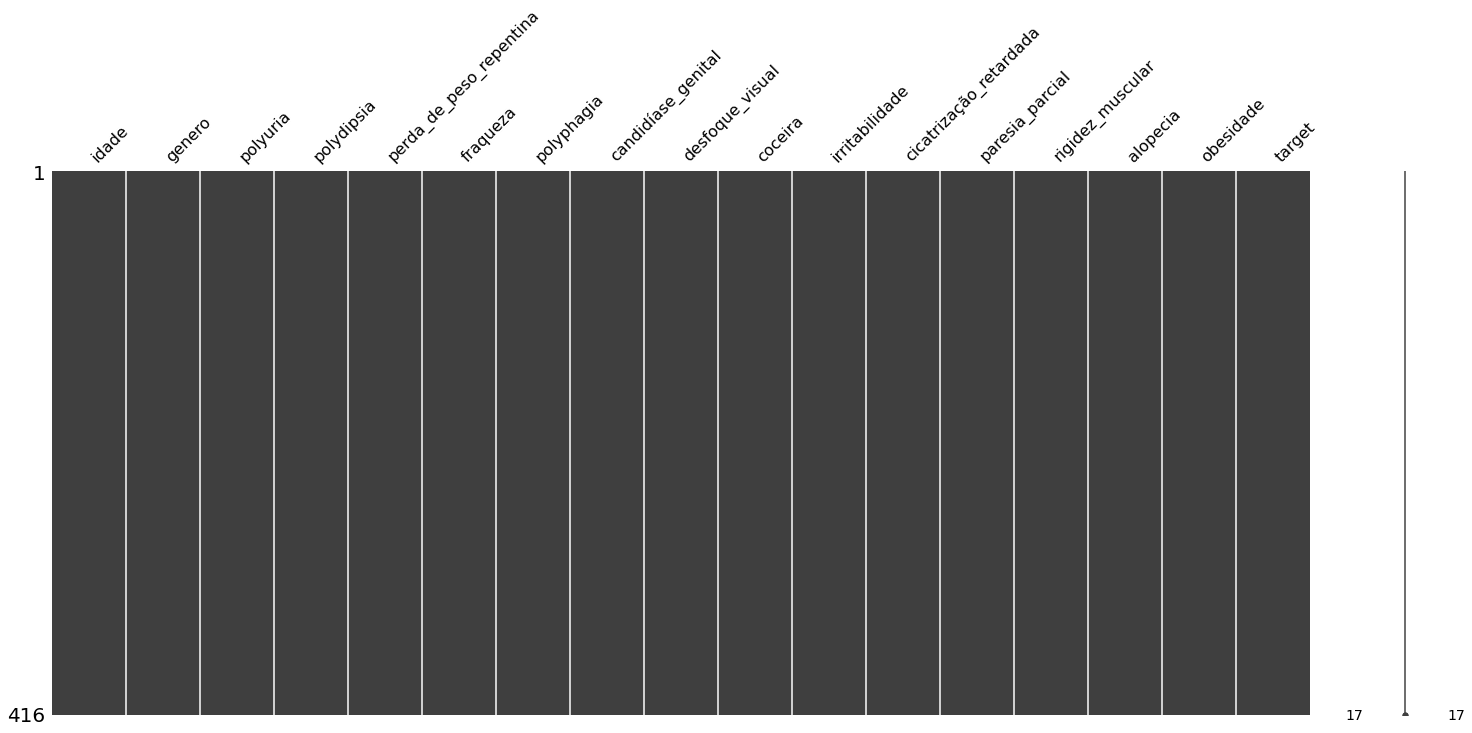

In [21]:
#Plotando a matrix para uma melhor visualização.
msno.matrix(df_train)
plt.show()

Não há missings. Mas, não há nada que nos garanta que após a atualização de base as colunas venham completas. Tentaremos achar uma padrão para inputar os null mais a frente. Na etapa de modelagem criaremos um Pipeline afim de empreenchê-lo com da melhor forma possível.


In [22]:
#Analisando se há colunas contantes para dropar. 
df_train, const_cols = remover_colunas_constantes(df_train)

In [23]:
df_train.head()

,idade,genero,polyuria,polydipsia,perda_de_peso_repentina,fraqueza,polyphagia,candidíase_genital,desfoque_visual,coceira,irritabilidade,cicatrização_retardada,paresia_parcial,rigidez_muscular,alopecia,obesidade,target
0,67,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,55,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
2,60,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,48,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0,1
4,31,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1


## Exportando dados e dicionário de dados


In [26]:
# Salvando o dicionario como pickle
with open(META_DATA_PATH, 'wb') as f:
    cloudpickle.dump(dicionario_tipo, f)

In [27]:
df_train.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TRAIN_NAME), index=False)

In [28]:
df_train.head()

,idade,genero,polyuria,polydipsia,perda_de_peso_repentina,fraqueza,polyphagia,candidíase_genital,desfoque_visual,coceira,irritabilidade,cicatrização_retardada,paresia_parcial,rigidez_muscular,alopecia,obesidade,target
0,67,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,55,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
2,60,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,48,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0,1
4,31,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1
